<a href="https://colab.research.google.com/github/mariduff/DATASCIENCE_BI/blob/main/notebooks/ETL_Clustering_prediccion_puesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path("/content/drive/MyDrive/TFM")
DATA_DIR = BASE_DIR / "data"
RUTA_ORIGINAL = DATA_DIR / "TTT.xlsx"
RUTA_PROCESSED = DATA_DIR / "processed"

print("BASE_DIR:", BASE_DIR)
print("DATA_DIR:", DATA_DIR)
print("RUTA_ORIGINAL:", RUTA_ORIGINAL)

BASE_DIR: /content/drive/MyDrive/TFM
DATA_DIR: /content/drive/MyDrive/TFM/data
RUTA_ORIGINAL: /content/drive/MyDrive/TFM/data/TTT.xlsx


In [3]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel(RUTA_ORIGINAL)

# Ver columnas y primeras filas
print(df.columns)
print(df.head())


Index(['Unnamed: 0', 'CD_CENTRO', 'TEMPORALIDAD', 'PUESTO', 'ASISTENCIAL',
       'No. Empleado', 'FTE Contratación', 'FTE Sin Absentismo',
       'FTE Absentismo', 'Plantilla Total Absentismo', 'Acumulación Lactancia',
       'AT / EP', 'Ausencia NO justificada', 'Días Asuntos Propios',
       'EC / ANL', 'Horas Comité Seguridad', 'Horas sindicales',
       'Huelga Parcial', 'Huelga Total', 'Maternidad', 'Paternidad',
       'Permiso retribuido', 'Permiso sin sueldo', 'RdE', 'Vacaciones',
       'Vacaciones año ant.', 'FTE reemplazo Vacaciones', 'CAPACIDAD',
       'Ocupacion Media', 'Ocupacion Media Res', 'Ocupacion Media CD',
       'Ocupacion facturada', 'RESIDENCIAL'],
      dtype='object')
  Unnamed: 0 CD_CENTRO TEMPORALIDAD                     PUESTO  \
0 2023-01-01   CENTRO1   *No Aplica                 *No Aplica   
1 2023-01-01   CENTRO1   Indefinido  AUXILIAR ADMINISTRATIVO/A   
2 2023-01-01   CENTRO1   Indefinido          DIRECTOR/A CENTRO   
3 2023-01-01   CENTRO1   Indefi

In [4]:


# Normalizar nombres de columnas
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.lower()
)

print("Shape (filas, columnas):", df.shape)  # Tamaño del dataset
display(df.head(10))                         # Primeras filas
display(df.dtypes.to_frame("dtype"))         # Tipos de datos por columna

Shape (filas, columnas): (123940, 33)


,unnamed:_0,cd_centro,temporalidad,puesto,asistencial,no._empleado,fte_contratación,fte_sin_absentismo,fte_absentismo,plantilla_total_absentismo,...,rde,vacaciones,vacaciones_año_ant.,fte_reemplazo_vacaciones,capacidad,ocupacion_media,ocupacion_media_res,ocupacion_media_cd,ocupacion_facturada,residencial
0,2023-01-01,CENTRO1,*No Aplica,*No Aplica,NO ASISTENCIAL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,RESIDENCIAL
1,2023-01-01,CENTRO1,Indefinido,AUXILIAR ADMINISTRATIVO/A,NO ASISTENCIAL,1.0,0.999998,0.999998,NaN,0.032258,...,NaN,0.032258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
2,2023-01-01,CENTRO1,Indefinido,DIRECTOR/A CENTRO,NO ASISTENCIAL,1.0,0.999998,0.999998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
3,2023-01-01,CENTRO1,Indefinido,ENFERMERO/A,ASISTENCIAL,1.0,0.125085,0.108945,0.016140,0.016140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
4,2023-01-01,CENTRO1,Total,NaN,NaN,3.0,2.125081,2.108941,0.016140,0.048398,...,NaN,0.032258,NaN,NaN,103.0,NaN,NaN,NaN,NaN,RESIDENCIAL
5,2023-01-01,CENTRO2,*No Aplica,*No Aplica,NO ASISTENCIAL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,178.0,151.709677,151.709677,NaN,151.261372,RESIDENCIAL
6,2023-01-01,CENTRO2,Indefinido,ASISTENTE DIRECCION,NO ASISTENCIAL,1.0,0.999998,0.999998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
7,2023-01-01,CENTRO2,Indefinido,AUXILIAR MANTENIMIENTO,NO ASISTENCIAL,1.0,0.999998,0.419354,0.580644,0.580644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
8,2023-01-01,CENTRO2,Indefinido,AYUDANTE COCINA,NO ASISTENCIAL,1.0,0.499999,0.499999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL
9,2023-01-01,CENTRO2,Indefinido,COCINERO/A,NO ASISTENCIAL,4.0,3.749977,3.556429,0.193548,0.225806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENCIAL


,dtype
unnamed:_0,datetime64[ns]
cd_centro,object
temporalidad,object
puesto,object
asistencial,object
no._empleado,float64
fte_contratación,float64
fte_sin_absentismo,float64
fte_absentismo,float64
plantilla_total_absentismo,float64


In [5]:
df = df[~df['puesto'].astype(str).str.contains('Total|#No Aplica', na=False)]

In [6]:
df = df.rename(columns={
    'unnamed:_0': 'fecha',
    'ec_/_anl': 'ec_anl',
    'fte_contratación': 'fte_contratacion',
    'cd_centro': 'centro'
})

In [7]:
# Asegurar que fecha es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Eliminar filas donde el puesto no es válido
df = df[~df['puesto'].astype(str).str.contains('Total|No Aplica', case=False, na=False)]

# Eliminar filas con FTE = 0 o NaN para evitar división por 0
df = df[df['fte_contratacion'] > 0]
df = df.dropna(subset=['ec_anl', 'fte_contratacion'])


In [8]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [9]:
# Eliminar filas con FTE = 0 o NaN para evitar división por 0
df = df[df['fte_contratacion'] > 0]
df = df.dropna(subset=['ec_anl', 'fte_contratacion'])

# Calcular EC/ANL relativo
df['ec_anl_relativo'] = df['ec_anl'] / df['fte_contratacion']

In [10]:
# Seleccionar columnas clave
df_modelo = df[['fecha', 'centro', 'puesto', 'ec_anl_relativo']]

In [11]:
print(df_modelo.head)

<bound method NDFrame.head of             fecha     centro              puesto  ec_anl_relativo
3      2023-01-01    CENTRO1         ENFERMERO/A         0.129032
4      2023-01-01    CENTRO1                 NaN         0.007595
9      2023-01-01    CENTRO2          COCINERO/A         0.051613
12     2023-01-01    CENTRO2         ENFERMERO/A         0.333333
14     2023-01-01    CENTRO2        GEROCULTOR/A         0.092067
...           ...        ...                 ...              ...
123919 2025-06-01  CENTRO277          COCINERO/A         0.552484
123924 2025-06-01  CENTRO277         LIMPIADOR/A         0.500030
123927 2025-06-01  CENTRO277       RECEPCIONISTA         0.156502
123933 2025-06-01  CENTRO277  AUXILIAR SANITARIO         0.026146
123939 2025-06-01  CENTRO277                 NaN         0.119150

[30380 rows x 4 columns]>


In [12]:
# Agrupar por centro, puesto y fecha (por si hay duplicados)
df_grouped = df_modelo.groupby(['fecha', 'centro', 'puesto'])['ec_anl_relativo'].mean().reset_index()

In [13]:
# Eliminar filas con nulos en columnas clave
df_grouped = df_grouped.dropna(subset=['fecha', 'centro', 'puesto', 'ec_anl_relativo'])

In [14]:
# Número total de filas
print(f"Número total de filas: {len(df_grouped)}")

# Porcentaje de nulos por columna
null_percent = df_grouped.isnull().mean() * 100
print("\nPorcentaje de valores nulos por columna:")
print(null_percent.sort_values(ascending=False))

# Valores únicos por columna (útil para detectar errores tipo '   Enfermero/a')
print("\nNúmero de valores únicos por columna:")
print(df_grouped.nunique())

# Revisar si hay ec_anl_relativo = 0 o valores extremos
print("\nResumen estadístico de 'ec_anl_relativo':")
print(df_grouped['ec_anl_relativo'].describe())

# Verificar que 'fecha' es datetime y está ordenada
print(f"\nTipo de dato de 'fecha': {df_grouped['fecha'].dtype}")
print(f"Rango de fechas: {df_grouped['fecha'].min()} → {df_grouped['fecha'].max()}")


Número total de filas: 20689

Porcentaje de valores nulos por columna:
fecha              0.0
centro             0.0
puesto             0.0
ec_anl_relativo    0.0
dtype: float64

Número de valores únicos por columna:
fecha                 30
centro               188
puesto               118
ec_anl_relativo    12586
dtype: int64

Resumen estadístico de 'ec_anl_relativo':
count    20689.000000
mean         0.278515
std          0.273159
min          0.000653
25%          0.085535
50%          0.178623
75%          0.366667
max          1.000000
Name: ec_anl_relativo, dtype: float64

Tipo de dato de 'fecha': datetime64[ns]
Rango de fechas: 2023-01-01 00:00:00 → 2025-06-01 00:00:00


Vemos como se distribuye el absentismo relativo:

           fecha     centro                  puesto  ec_anl_relativo
1641  2023-03-01  CENTRO165             LIMPIADOR/A         0.048387
66    2023-01-01  CENTRO123              SUPERVISOR         0.056452
17355 2025-02-01  CENTRO153      AUXILIAR SANITARIO         0.208301
20202 2025-06-01  CENTRO167         GEROC./AUX.ENF.         0.193775
1974  2023-03-01   CENTRO40           RECEPCIONISTA         0.255638
19067 2025-04-01  CENTRO266                LOGOPEDA         1.000000
14631 2024-10-01  CENTRO174             LIMPIADOR/A         0.178715
2785  2023-04-01   CENTRO77           RECEPCIONISTA         0.333333
10640 2024-04-01  CENTRO208            GEROCULTOR/A         0.089937
9109  2024-02-01  CENTRO165  LIMPIADOR/A C. GALICIA         0.017241
                               fecha  ec_anl_relativo
count                          20689     20689.000000
mean   2024-03-18 08:07:21.277973760         0.278515
min              2023-01-01 00:00:00         0.000653
25%              2023-08-

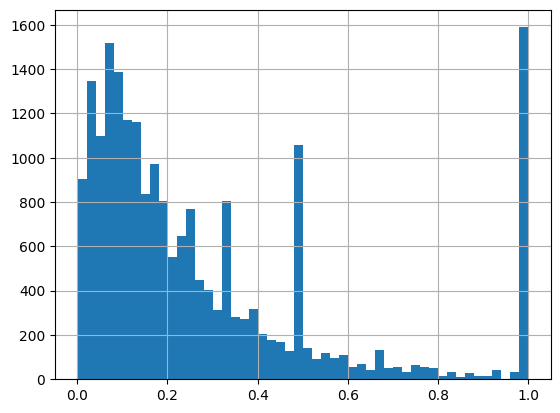

In [15]:
print(df_grouped.sample(10))
print(df_grouped.describe())
print(df_grouped['ec_anl_relativo'].hist(bins=50))


Quiero ver los puestos de trabajo distintos que tiene el dataset:

In [16]:
sorted(df_grouped['puesto'].unique().tolist())[:50]  # Ver los primeros 50 distintos


['6. AS/PAS-SUBALTERN LIMPIADOR',
 'ADMINISTRATIVO',
 'ANIMADOR SOCIOCULTURAL',
 'AS-TFPT AUX. INF. - AUXILIAR CLINICA',
 'AS-TFPT AUX. INF. - AUXILIAR FARMACIA',
 'AS-TFPT AUX. INF. - AUXILIAR SANITARIA',
 'AS-TFPT AUX. INF. - MONITOR T LIBRE',
 'AS-TGM INFERMERIA COORDINADOR/A DUE',
 'AS-TGM INFERMERIA DUE',
 'AS-TGM INFERMERIA FISIOTERAPEUTA',
 'AS-TGM INFERMERIA LOGOPEDA',
 'AS-TGM INFERMERIA TERAPEUTA OCUP.',
 'AS-TGM INFERMERIA TRABAJADOR SOCIAL',
 'AS-TGS FAC. PL. I PSICOLOGO',
 'AS-TGS FAC. PL. II MEDICO',
 'ASISTENTE DIRECCION',
 'ATENCION AL CLIENTE',
 'AUXILIAR ADMINISTRATIVO/A',
 'AUXILIAR CENTRO DE DIA',
 'AUXILIAR DE CLÍNICA',
 'AUXILIAR DE COCINA',
 'AUXILIAR DE FARMACIA',
 'AUXILIAR DE SERVICIOS',
 'AUXILIAR DE TRANSPORTE',
 'AUXILIAR ENFERMERÍA',
 'AUXILIAR FARMACIA',
 'AUXILIAR GERIATRIA',
 'AUXILIAR LIMPIEZA',
 'AUXILIAR MANTENIMIENTO',
 'AUXILIAR PELUQUERA',
 'AUXILIAR SANITARIO',
 'AUXILIAR SERVICIOS DIVERSOS',
 'AUXILIAR SERVICIOS GENERALES',
 'AYUDANTE  CONDUCTOR

Ya vemos que se repiten muchos pero con distinta nomenclatura. Vamos a quedarnos con los nombres que más se repiten:

In [17]:
puestos_count = df_grouped['puesto'].value_counts().reset_index()
puestos_count.columns = ['puesto', 'num_registros']
print(puestos_count.head(50))  # los 50 más frecuentes


                               puesto  num_registros
0                         LIMPIADOR/A           2999
1                        GEROCULTOR/A           2531
2                          COCINERO/A           1692
3                         ENFERMERO/A           1407
4                  AUXILIAR SANITARIO           1236
5                     AYUDANTE COCINA           1116
6                       RECEPCIONISTA            890
7                     GEROC./AUX.ENF.            761
8                      FISIOTERAPEUTA            542
9              LIMPIADOR/A LAVANDERIA            509
10             LIMPIADOR/A C. GALICIA            448
11                         SUPERVISOR            394
12                             MEDICO            377
13                AUXILIAR ENFERMERÍA            354
14              TERAPEUTA OCUPACIONAL            354
15                TRABAJADOR/A SOCIAL            323
16                             PINCHE            323
17              OFICIAL MANTENIMIENTO         

Nos quedamos con los 28 primeros

In [18]:
puestos_top28 = [
    'LIMPIADOR/A',
    'GEROCULTOR/A',
    'COCINERO/A',
    'ENFERMERO/A',
    'AUXILIAR SANITARIO',
    'AYUDANTE COCINA',
    'RECEPCIONISTA',
    'GEROC./AUX.ENF.',
    'FISIOTERAPEUTA',
    'LIMPIADOR/A LAVANDERIA',
    'LIMPIADOR/A C. GALICIA',
    'SUPERVISOR',
    'MEDICO',
    'AUXILIAR ENFERMERÍA',
    'TERAPEUTA OCUPACIONAL',
    'TRABAJADOR/A SOCIAL',
    'PINCHE',
    'OFICIAL MANTENIMIENTO',
    'AYUDANTE OFICIOS VARIOS',
    'CONDUCTOR',
    'AUXILIAR DE COCINA',
    'AUXILIAR CENTRO DE DIA',
    'PSICOLOGO/A',
    'ANIMADOR SOCIOCULTURAL',
    'T.A.S.O.C.',
    'AUXILIAR MANTENIMIENTO',
    'JEFE/A SERVICIOS HOTELEROS (SSHH)',
    'CUIDADOR/A',
    'AUXILIAR DE TRANSPORTE'
]


In [19]:
df_filtrado = df_grouped[df_grouped['puesto'].isin(puestos_top28)].copy()
print(f"Filas restantes tras filtrar: {len(df_filtrado)}")
print(f"Puestos únicos tras filtrar: {df_filtrado['puesto'].nunique()}")


Filas restantes tras filtrar: 18605
Puestos únicos tras filtrar: 29


Quiero agrupar/estandarizar algunos puestos:

In [20]:
map_puestos = {
    # Unificar transporte y conductor
    'AUXILIAR DE TRANSPORTE': 'Conductor/a',
    'CONDUCTOR': 'Conductor/a',

    # Unificar animación sociocultural
    'ANIMADOR SOCIOCULTURAL': 'Animador/a Sociocultural',
    'T.A.S.O.C.': 'Animador/a Sociocultural'}

# Aplicar mapeo
df_filtrado['puesto'] = df_filtrado['puesto'].replace(map_puestos)

Eliminamos el puesto de Auxiliar de centro de día ya que en la otra predicción me basé únicamente en las plazas residenciales. Y este puesto de trabajo solo afecta a las plazas de centro de día, no lo necesitamos.

In [21]:

df_filtrado = df_filtrado[df_filtrado['puesto'] != 'AUXILIAR CENTRO DE DIA']

In [22]:
# Comprobamos
print(f"Puestos finales únicos: {df_filtrado['puesto'].nunique()}")
print(df_filtrado['puesto'].value_counts().head(28))

Puestos finales únicos: 26
puesto
LIMPIADOR/A                          2999
GEROCULTOR/A                         2531
COCINERO/A                           1692
ENFERMERO/A                          1407
AUXILIAR SANITARIO                   1236
AYUDANTE COCINA                      1116
RECEPCIONISTA                         890
GEROC./AUX.ENF.                       761
FISIOTERAPEUTA                        542
LIMPIADOR/A LAVANDERIA                509
LIMPIADOR/A C. GALICIA                448
SUPERVISOR                            394
Conductor/a                           383
MEDICO                                377
Animador/a Sociocultural              369
AUXILIAR ENFERMERÍA                   354
TERAPEUTA OCUPACIONAL                 354
PINCHE                                323
TRABAJADOR/A SOCIAL                   323
OFICIAL MANTENIMIENTO                 307
AYUDANTE OFICIOS VARIOS               305
AUXILIAR DE COCINA                    236
PSICOLOGO/A                           192


Exportamos este excel ya transformado para usarlo más adelante en R

In [23]:
import pandas as pd
df_filtrado.to_excel("ETL_analisis_puesto_filtrado.xlsx", index=False)


In [24]:
from google.colab import files
files.download("ETL_analisis_puesto_filtrado.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizamos la media de absentismo por puesto:

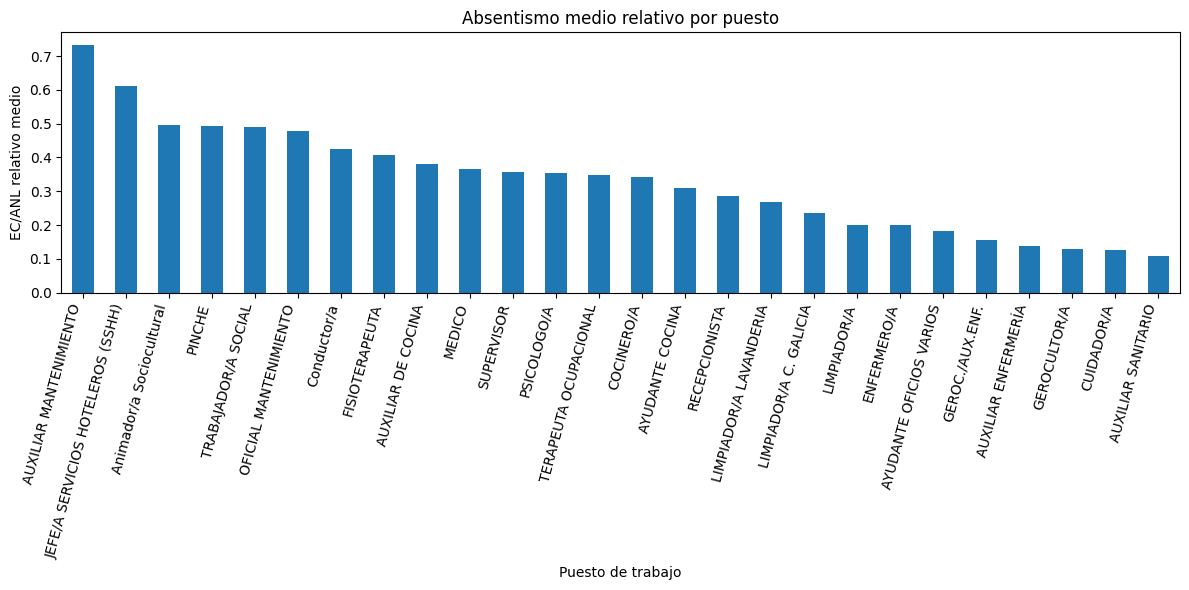

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_filtrado.groupby('puesto')['ec_anl_relativo'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Absentismo medio relativo por puesto')
plt.ylabel('EC/ANL relativo medio')
plt.xlabel('Puesto de trabajo')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


Vemos ahora dispersión y outliers:

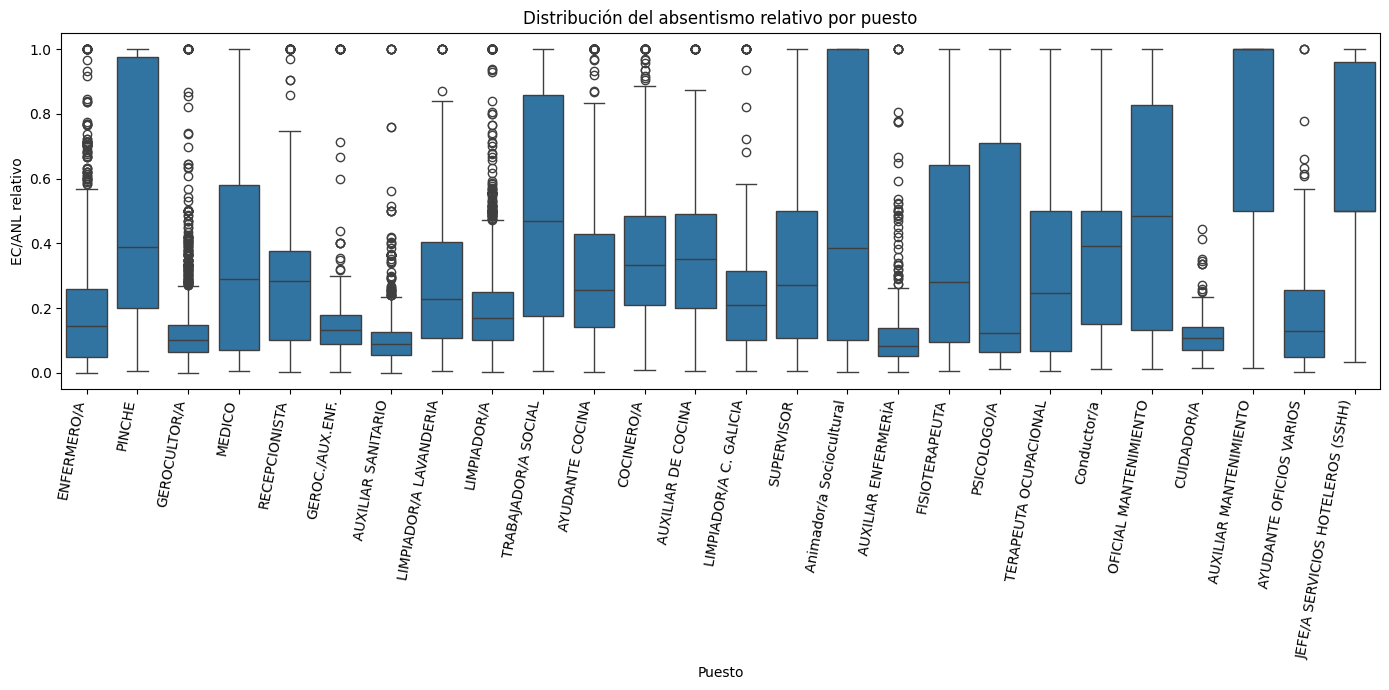

In [26]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtrado, x='puesto', y='ec_anl_relativo')
plt.title('Distribución del absentismo relativo por puesto')
plt.ylabel('EC/ANL relativo')
plt.xlabel('Puesto')
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()


Puestos como pinche, o animador sociocultural tienen alta dispersión y muchos outliers, habrá mucha variabilidad entre centros o meses.
Hay puestos más estables como el de supervisor, pueden tener un absentismo más predecible.

Vamos a ordenarlo por mediana, para ver top:

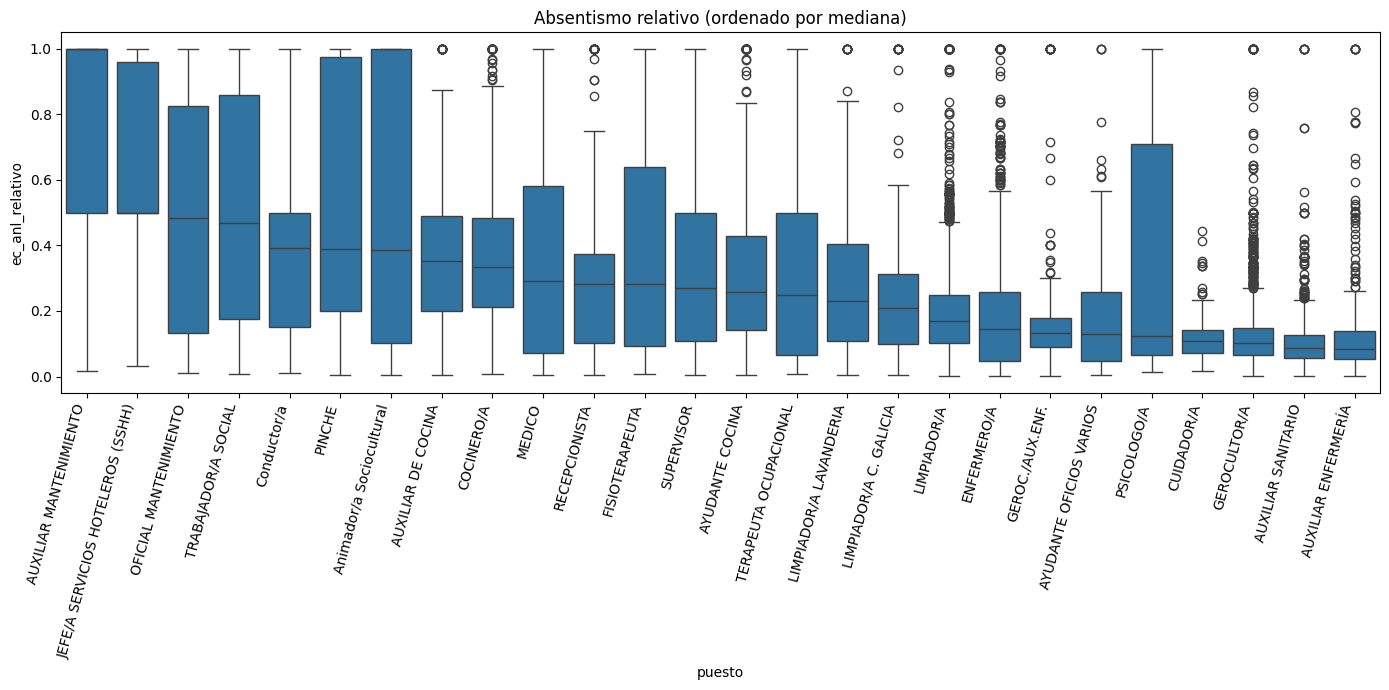

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por mediana
orden = df_filtrado.groupby('puesto')['ec_anl_relativo'].median().sort_values(ascending=False).index

plt.figure(figsize=(14,7))
sns.boxplot(data=df_filtrado, x='puesto', y='ec_anl_relativo', order=orden)
plt.title('Absentismo relativo (ordenado por mediana)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


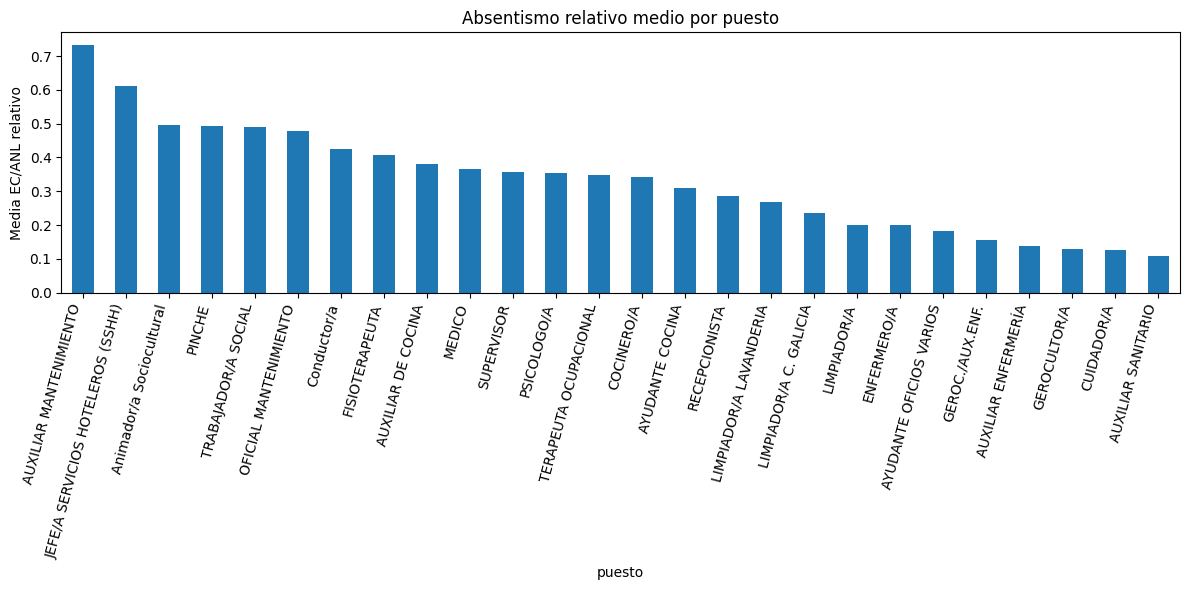

In [28]:
plt.figure(figsize=(12,6))
(df_filtrado.groupby('puesto')['ec_anl_relativo']
 .mean()
 .sort_values(ascending=False)
 .plot(kind='bar'))
plt.title('Absentismo relativo medio por puesto')
plt.ylabel('Media EC/ANL relativo')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


Los puestos con absentismo medio más alto son: auxiliar de mantenimiento, jefe/a de SSHH, animador sociocultural, pinche y trabajador/a social.

Lo que sorprende de este análisis es que los puestos de auxiliar sanitario o gerocultor/a (que son los que tratan más horas a los residentes y los que pueden tener mayor carga de trabajo o estrés) no se dan de baja como esperaba.

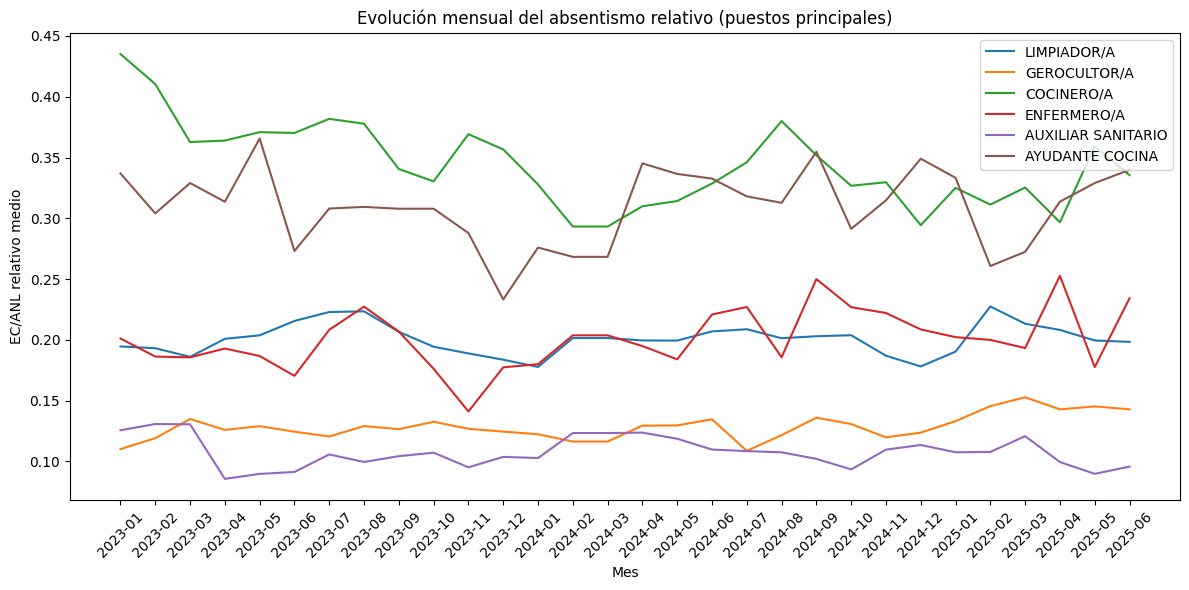

In [29]:
df_filtrado['mes'] = df_filtrado['fecha'].dt.to_period('M')
df_tendencia = df_filtrado.groupby(['mes', 'puesto'])['ec_anl_relativo'].mean().reset_index()

puestos_top = df_filtrado['puesto'].value_counts().head(6).index

plt.figure(figsize=(12,6))
for p in puestos_top:
    subset = df_tendencia[df_tendencia['puesto'] == p]
    plt.plot(subset['mes'].astype(str), subset['ec_anl_relativo'], label=p)

plt.title('Evolución mensual del absentismo relativo (puestos principales)')
plt.ylabel('EC/ANL relativo medio')
plt.xlabel('Mes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Despues de ver evolutivos, se ven picos que pueden significar algo (Estacionalidad)

Vamos a hacer clustering antes de pasar a la predicción para descubrir qué puestos tienen comportamientos parecidos

Hacemos primero el método del codo para ver cuantos clusters sacar:

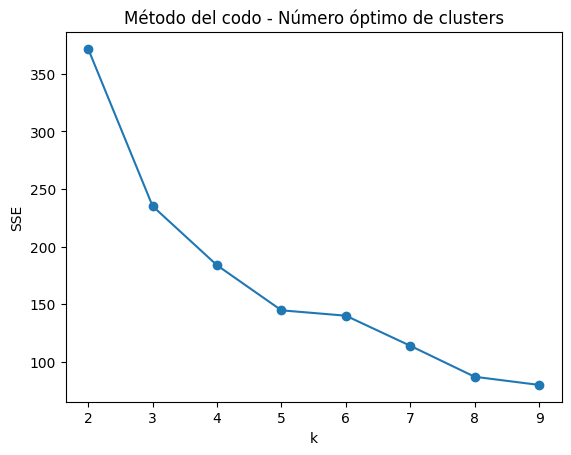

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Agrupar por puesto y mes: media de absentismo
df_filtrado['mes'] = df_filtrado['fecha'].dt.to_period('M')
df_cluster = df_filtrado.groupby(['puesto', 'mes'])['ec_anl_relativo'].mean().unstack(fill_value=0)

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elegir número óptimo de clusters (elbow)
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse, marker='o')
plt.title('Método del codo - Número óptimo de clusters')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


La curva muestra una caída pronunciada hasta el punto 4 o 5, ya que a partir de aquí se estabiliza un poco. Vamos a utilizar k-means con 4 clusters:

cluster
1    9
0    8
3    7
2    2
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

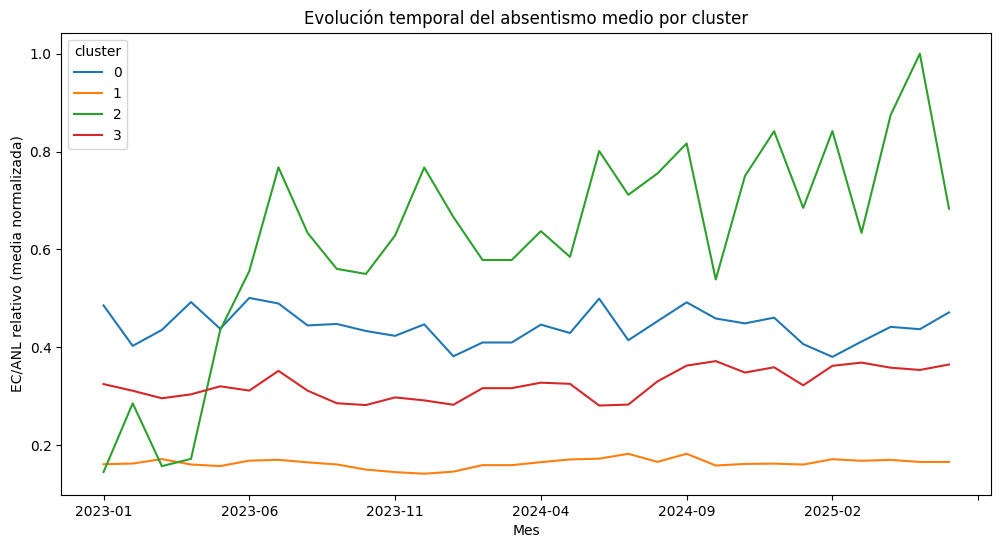

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ajustar modelo con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Añadir cluster al DataFrame original (por puesto)
cluster_labels = df_cluster['cluster']
puestos_clusters = pd.DataFrame({
    'puesto': df_cluster.index,
    'cluster': cluster_labels
})

# Ver cuántos puestos hay en cada cluster
print(puestos_clusters['cluster'].value_counts())

# Visualizar distribución media por cluster
plt.figure(figsize=(10,5))
df_cluster.groupby('cluster').mean().T.plot(legend=True, figsize=(12,6))
plt.title('Evolución temporal del absentismo medio por cluster')
plt.xlabel('Mes')
plt.ylabel('EC/ANL relativo (media normalizada)')
plt.show()


En el anterior gráfico podemos ver:
- Verde: absentismo alto y muy variable y con estacionalidad fuerte, presentando picos periódicos, cluster candidato principal para modelado SARIMA.
- Azul: Absentismo medio estable, con pequeñas fluctuaciones
- Rojo: serie relativamente estable, ligero incremento hacia 2025.
- Amarillo: curva casi plana, sin estacionalidad aparente

Vamos a ver qué puestos hay en cada cluster:

In [32]:
puestos_por_cluster = pd.DataFrame({
    'puesto': df_cluster.index,
    'cluster': kmeans.labels_
})

# Contar puestos por cluster
print(puestos_por_cluster['cluster'].value_counts())

# Ver qué puestos están en cada cluster
for i in range(4):
    print(f"\nCluster {i}:")
    print(puestos_por_cluster[puestos_por_cluster['cluster'] == i]['puesto'].tolist())


cluster
1    9
0    8
3    7
2    2
Name: count, dtype: int64

Cluster 0:
['AUXILIAR DE COCINA', 'Animador/a Sociocultural', 'Conductor/a', 'FISIOTERAPEUTA', 'OFICIAL MANTENIMIENTO', 'PINCHE', 'PSICOLOGO/A', 'TRABAJADOR/A SOCIAL']

Cluster 1:
['AUXILIAR ENFERMERÍA', 'AUXILIAR SANITARIO', 'AYUDANTE OFICIOS VARIOS', 'CUIDADOR/A', 'ENFERMERO/A', 'GEROC./AUX.ENF.', 'GEROCULTOR/A', 'LIMPIADOR/A', 'LIMPIADOR/A C. GALICIA']

Cluster 2:
['AUXILIAR MANTENIMIENTO', 'JEFE/A SERVICIOS HOTELEROS (SSHH)']

Cluster 3:
['AYUDANTE COCINA', 'COCINERO/A', 'LIMPIADOR/A LAVANDERIA', 'MEDICO', 'RECEPCIONISTA', 'SUPERVISOR', 'TERAPEUTA OCUPACIONAL']


Creo un dataframe con esto para usarlo luego en R.

In [33]:
# Crear DataFrame con puesto y cluster asignado
puestos_por_cluster = pd.DataFrame({
    'puesto': df_cluster.index,
    'cluster': kmeans.labels_
})


In [34]:
# Calcular absentismo medio por puesto
absentismo_medio_puesto = df_filtrado.groupby('puesto')['ec_anl_relativo'].mean().reset_index()
absentismo_medio_puesto.columns = ['puesto', 'absentismo_medio']

# Unir con la información del cluster
puestos_cluster_media = puestos_por_cluster.merge(absentismo_medio_puesto, on='puesto', how='left')


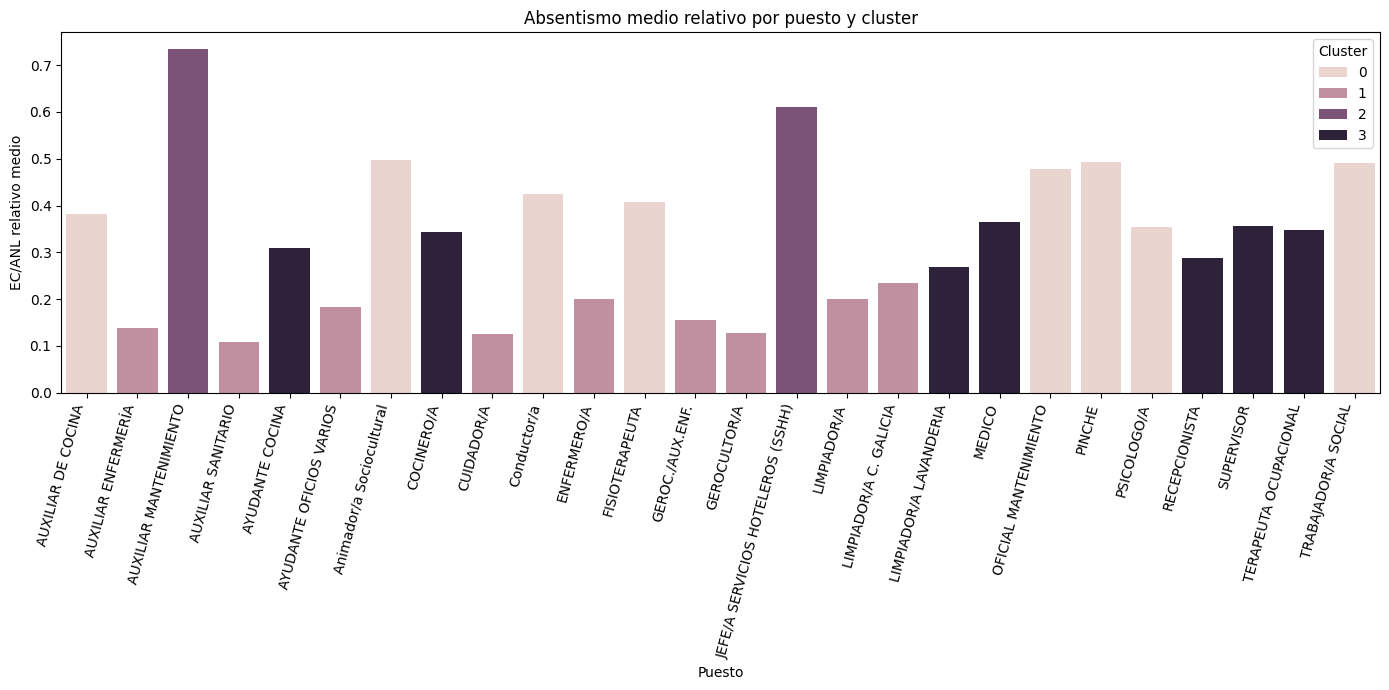

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(
    data=puestos_cluster_media,
    x='puesto',
    y='absentismo_medio',
    hue='cluster'
)
plt.title('Absentismo medio relativo por puesto y cluster')
plt.ylabel('EC/ANL relativo medio')
plt.xlabel('Puesto')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


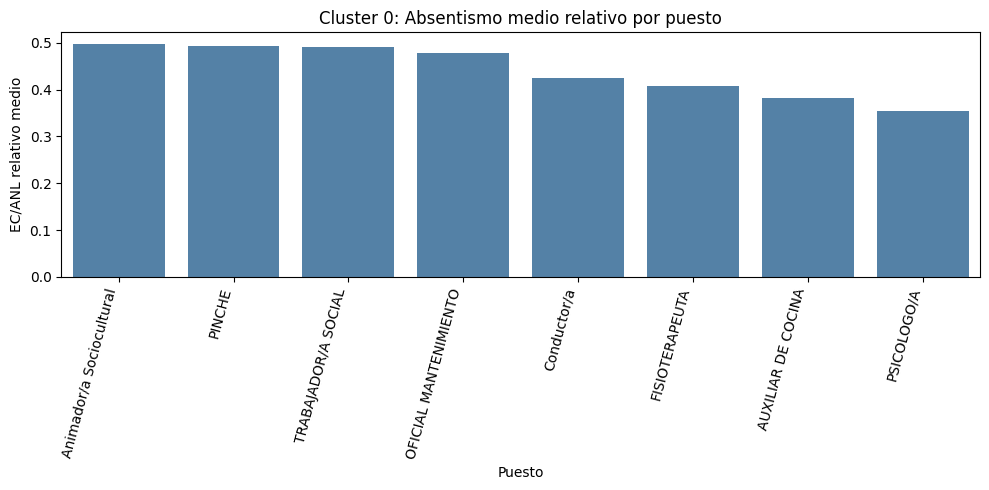

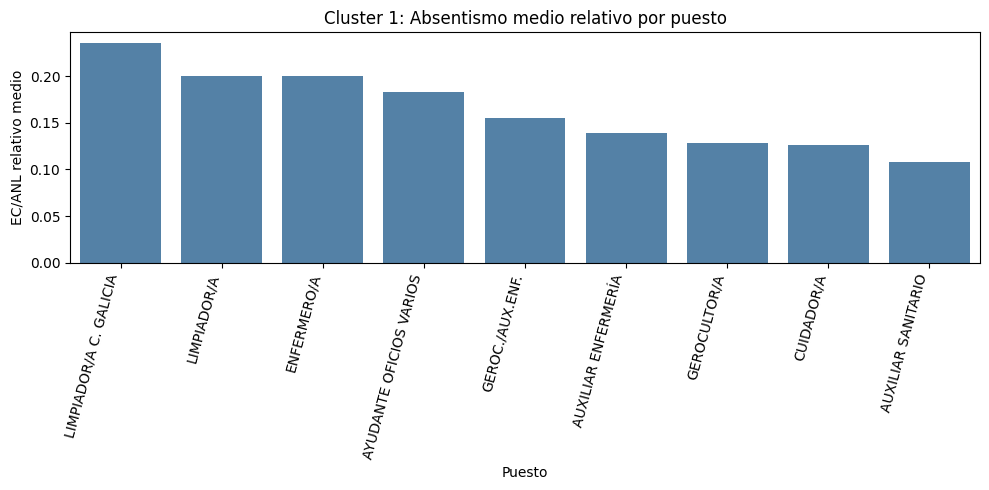

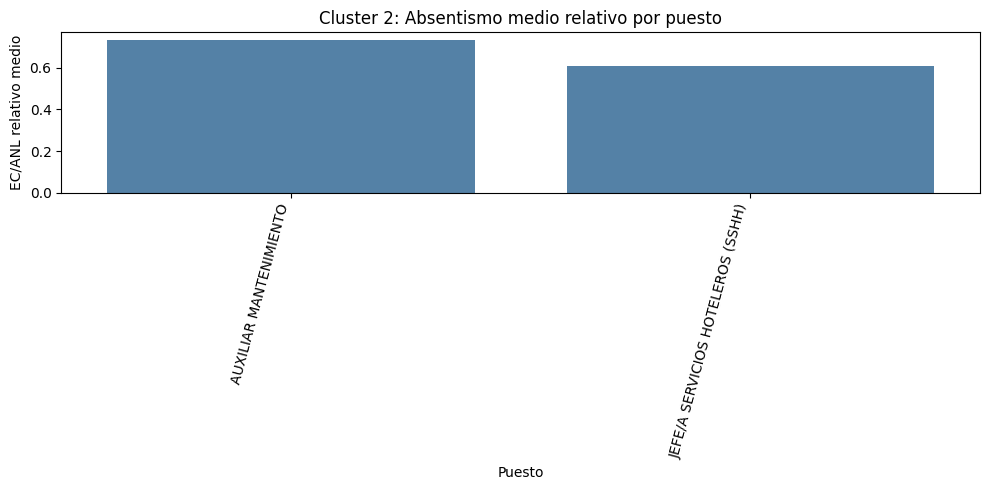

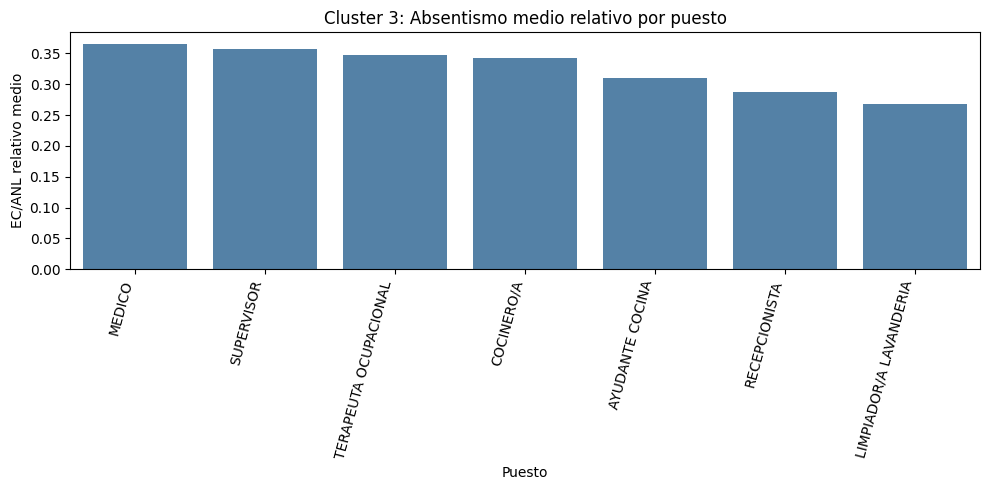

In [36]:
for c in sorted(puestos_cluster_media['cluster'].unique()):
    subset = puestos_cluster_media[puestos_cluster_media['cluster'] == c].sort_values('absentismo_medio', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=subset, x='puesto', y='absentismo_medio', color='steelblue')
    plt.title(f'Cluster {c}: Absentismo medio relativo por puesto')
    plt.ylabel('EC/ANL relativo medio')
    plt.xlabel('Puesto')
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3118106602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


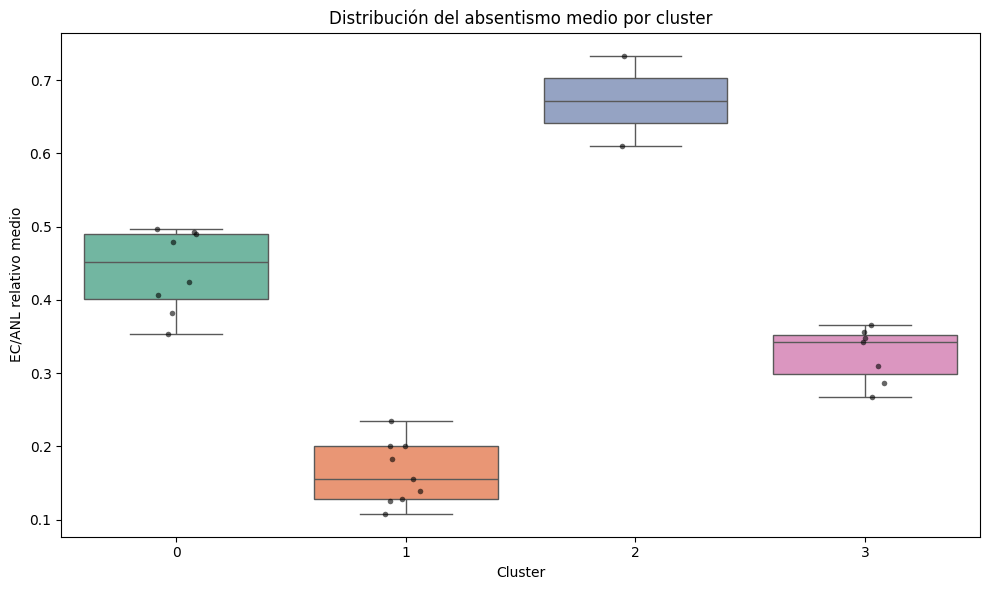

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=puestos_cluster_media,
    x='cluster',
    y='absentismo_medio',
    palette='Set2'
)
sns.stripplot(
    data=puestos_cluster_media,
    x='cluster',
    y='absentismo_medio',
    color='black',
    size=4,
    alpha=0.6
)
plt.title('Distribución del absentismo medio por cluster')
plt.xlabel('Cluster')
plt.ylabel('EC/ANL relativo medio')
plt.tight_layout()
plt.show()


El gráfico muestra diferencias claras y significativas entre los 4 grupos

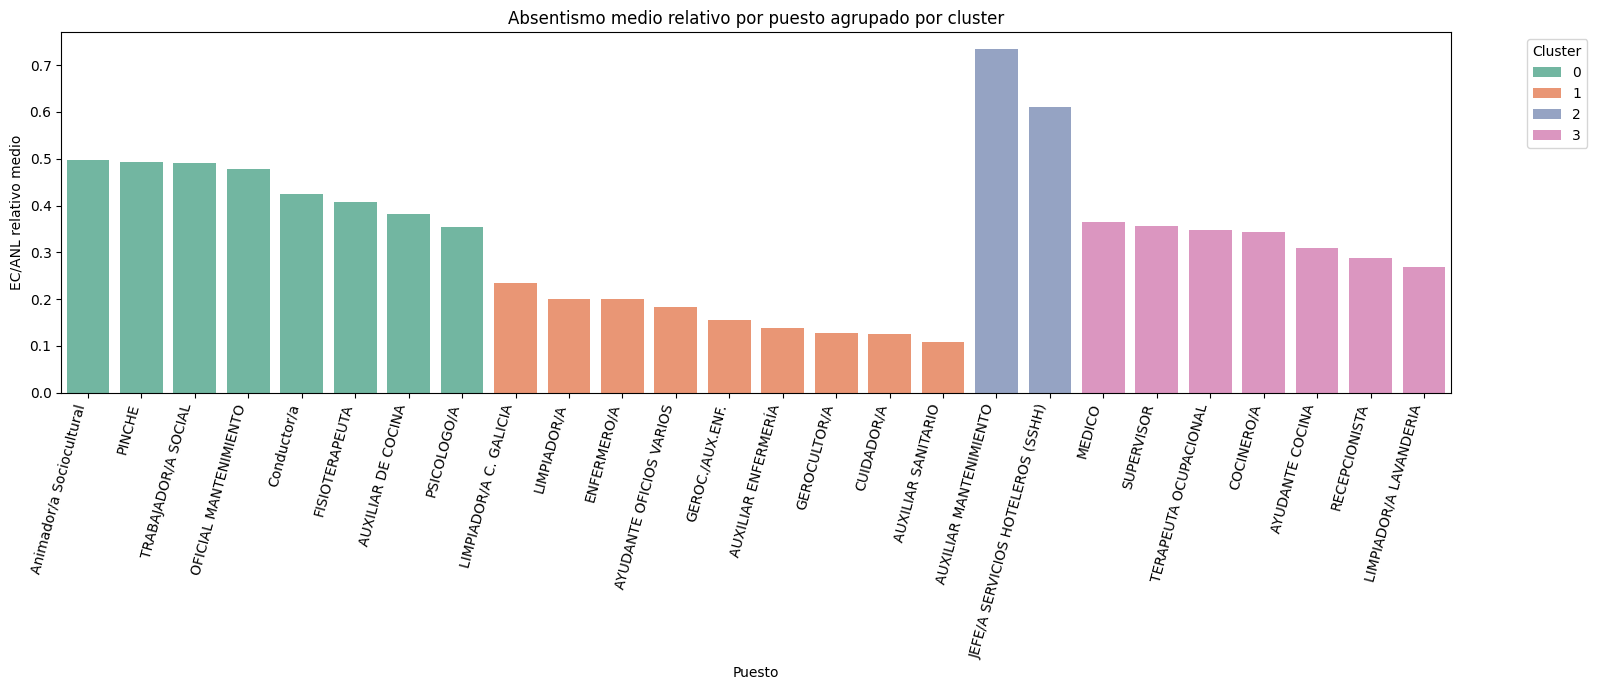

In [38]:
plt.figure(figsize=(16, 7))
sns.barplot(
    data=puestos_cluster_media.sort_values(['cluster', 'absentismo_medio'], ascending=[True, False]),
    x='puesto',
    y='absentismo_medio',
    hue='cluster',
    dodge=False,
    palette='Set2'
)
plt.title('Absentismo medio relativo por puesto agrupado por cluster')
plt.ylabel('EC/ANL relativo medio')
plt.xlabel('Puesto')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El grupo de auxiliar de mantenimiento y responsables SSHH destaca con los valores más altos de todo el conjunto.
Los cargos con carga física (animador, trabajador social, cocina, mantenimiento) se concentran en alto absentismo también.
Los puestos técnicos y más administrativos (medico, supervisor, psicólogo...) estan en cluster de bajo absentismo.

Vamos a añadir etiquetas para que nos ayude aún más la visualización:

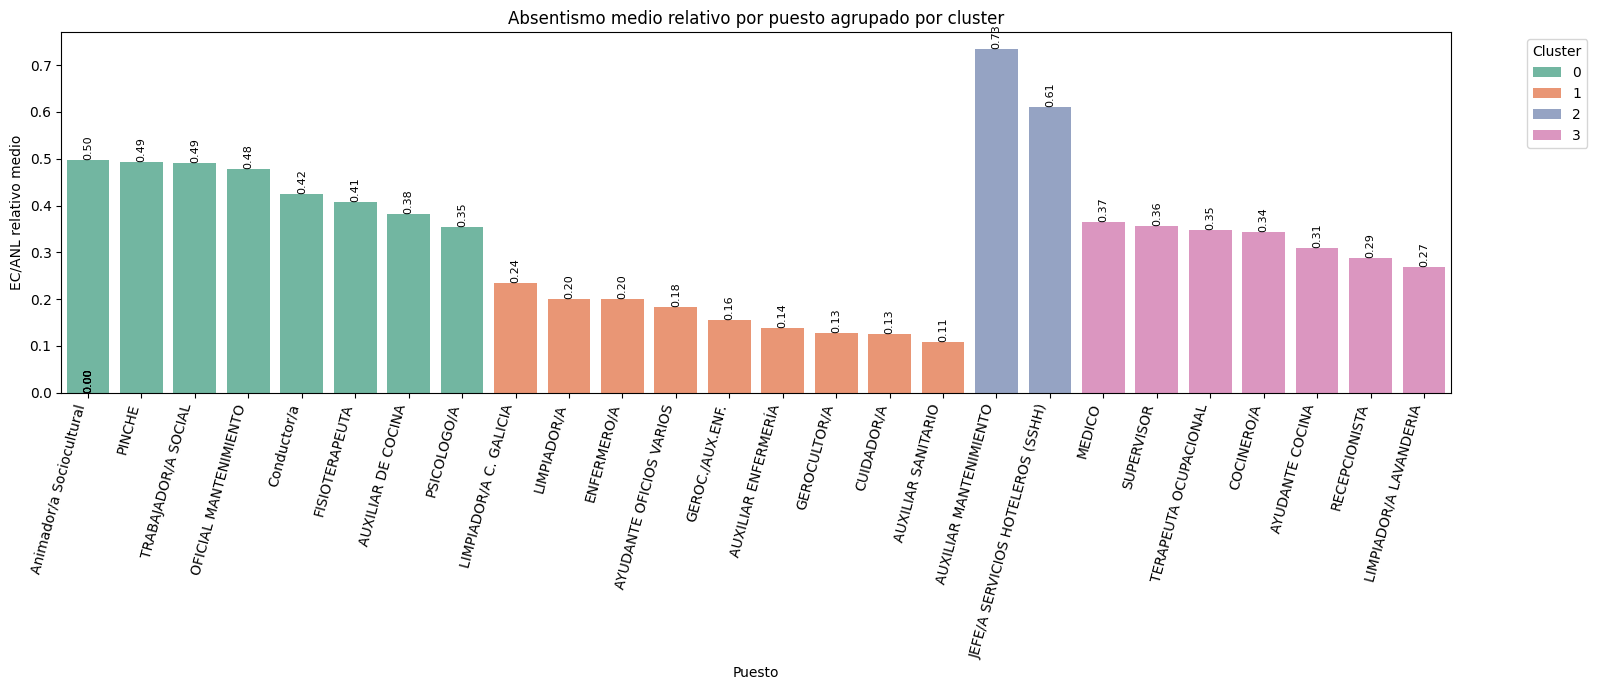

In [39]:
plt.figure(figsize=(16, 7))
ax = sns.barplot(
    data=puestos_cluster_media.sort_values(['cluster', 'absentismo_medio'], ascending=[True, False]),
    x='puesto',
    y='absentismo_medio',
    hue='cluster',
    dodge=False,
    palette='Set2'
)

# Añadir etiquetas numéricas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', rotation=90)

plt.title('Absentismo medio relativo por puesto agrupado por cluster')
plt.ylabel('EC/ANL relativo medio')
plt.xlabel('Puesto')
plt.xticks(rotation=75, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Exportamos el dataframe definido anteriormente para usarlo en R:

In [40]:
ruta_clusters = RUTA_PROCESSED / "puestos_por_cluster.csv"
puestos_por_cluster.to_csv(ruta_clusters, index=False)
print("Archivo exportado a:", ruta_clusters)


Archivo exportado a: /content/drive/MyDrive/TFM/data/processed/puestos_por_cluster.csv


Seguimos con la predicción aquí:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pandas.api.types import PeriodDtype
import numpy as np

# Copiar dataset base
df_pred = df_filtrado.copy()

# Añadir cluster
df_pred = df_pred.merge(puestos_por_cluster[['puesto', 'cluster']], on='puesto', how='left')

# Crear variables temporales
df_pred['mes_num'] = df_pred['fecha'].dt.month
df_pred['año'] = df_pred['fecha'].dt.year

# Convertir columnas tipo Period (si existen)
for col in df_pred.columns:
    if isinstance(df_pred[col].dtype, PeriodDtype):
        df_pred[col] = df_pred[col].astype(str)

# Asegurar tipos correctos
df_pred['mes_num'] = df_pred['mes_num'].astype(int)
df_pred['año'] = df_pred['año'].astype(int)

# ONE HOT ENCODING
df_pred = pd.get_dummies(df_pred, columns=['puesto', 'centro', 'cluster'], drop_first=True)

# Eliminar columnas no numéricas (por ejemplo '2024-09')
cols_to_drop = ['fecha', 'mes', 'ec_anl_relativo']
df_pred = df_pred.drop(columns=[c for c in cols_to_drop if c in df_pred.columns])

# Definir variables predictoras y target
X = df_pred.copy()
y = df_filtrado['ec_anl_relativo']  # target original

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluar
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # raíz cuadrada manual
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


RMSE: 0.1443
R²: 0.6741


Hay un 67% de poder explicativo, se podría mejorar.

Vamos a realizar un análisis de la importancia de variables:

Vamos a probar otros modelos predictivos, a ver si sacamos alguno con mejores resultados.

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Definir modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

# Entrenar y evaluar
resultados = []
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append((nombre, rmse, r2))

# Mostrar resultados ordenados
df_resultados = pd.DataFrame(resultados, columns=['Modelo', 'RMSE', 'R2']).sort_values('R2', ascending=False)
print(df_resultados)


             Modelo      RMSE        R2
3      RandomForest  0.144322  0.674068
5           XGBoost  0.180883  0.488014
4  GradientBoosting  0.200911  0.368358
1             Ridge  0.211602  0.299349
0  LinearRegression  0.211701  0.298691
2             Lasso  0.222230  0.227202


/tmp/ipython-input-1228864304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='Modelo', y='R2', palette='viridis')


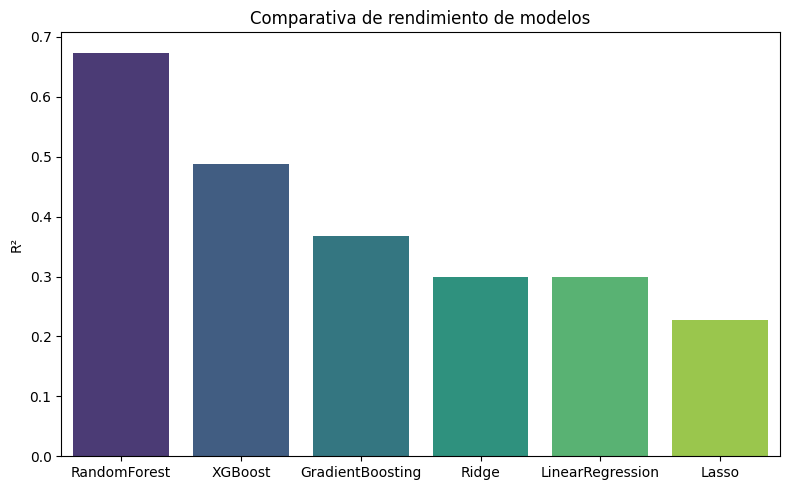

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_resultados, x='Modelo', y='R2', palette='viridis')
plt.title('Comparativa de rendimiento de modelos')
plt.ylabel('R²')
plt.xlabel('')
plt.tight_layout()
plt.show()


Ramdom Forest sigue siendo el mejor, vamos a intentar afinar sus parámetros

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definir la rejilla de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Crear el modelo base
rf = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("\n Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar modelo optimizado
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"\nModelo optimizado - RMSE: {rmse_best:.4f}, R²: {r2_best:.4f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py",


🔍 Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Modelo optimizado - RMSE: 0.1423, R²: 0.6831


In [45]:
{
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [46]:
# Entrenar el modelo final con los mejores hiperparámetros
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# Evaluar de nuevo en el conjunto de test
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f" Modelo final entrenado - RMSE: {rmse_best:.4f}, R²: {r2_best:.4f}")


 Modelo final entrenado - RMSE: 0.1423, R²: 0.6831


In [47]:
# Entrenar modelo final con todos los datos disponibles
best_rf_final = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

best_rf_final.fit(X, y)

print("Modelo final entrenado con todos los datos. Listo para predicciones futuras.")


Modelo final entrenado con todos los datos. Listo para predicciones futuras.


Creamos escenario de prediccion

In [48]:
import pandas as pd

# Crear rango de meses futuros: julio a diciembre de 2025
fechas_futuras = pd.date_range('2025-07-01', periods=6, freq='MS')

# Clusters definidos (los mismos 4 de tu análisis)
clusters = [0, 1, 2, 3]

# Crear todas las combinaciones de mes y cluster
escenarios = []
for fecha in fechas_futuras:
    for cluster in clusters:
        escenarios.append({
            'mes_num': fecha.month,
            'año': fecha.year,
            'cluster': cluster
        })

df_future = pd.DataFrame(escenarios)
print("📅 Escenario de predicción (primeras filas):")
print(df_future.head())


📅 Escenario de predicción (primeras filas):
   mes_num   año  cluster
0        7  2025        0
1        7  2025        1
2        7  2025        2
3        7  2025        3
4        8  2025        0


In [49]:
# Crear dummies de cluster (como en entrenamiento)
df_future = pd.get_dummies(df_future, columns=['cluster'], drop_first=True)

# Alinear columnas con el modelo entrenado
for col in X.columns:
    if col not in df_future.columns:
        df_future[col] = 0  # añadir columnas faltantes

# Reordenar columnas para coincidir exactamente
df_future = df_future[X.columns]

print("✅ Estructura final lista para predecir:")
print(df_future.shape)


✅ Estructura final lista para predecir:
(24, 215)


/tmp/ipython-input-637996349.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_future[col] = 0  # añadir columnas faltantes
/tmp/ipython-input-637996349.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_future[col] = 0  # añadir columnas faltantes
/tmp/ipython-input-637996349.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [50]:
# Predecir absentismo relativo
y_pred_future = best_rf_final.predict(df_future)

# Crear DataFrame de resultados
df_result_pred = pd.DataFrame({
    'fecha': fechas_futuras.repeat(len(clusters)),
    'cluster': [c for c in clusters for _ in range(len(fechas_futuras))],
    'pred_ec_anl_relativo': y_pred_future
})

print("📈 Predicciones generadas:")
print(df_result_pred.head(10))


📈 Predicciones generadas:
       fecha  cluster  pred_ec_anl_relativo
0 2025-07-01        0              0.345981
1 2025-07-01        0              0.156136
2 2025-07-01        0              0.594092
3 2025-07-01        0              0.284025
4 2025-08-01        0              0.363696
5 2025-08-01        0              0.149971
6 2025-08-01        1              0.607095
7 2025-08-01        1              0.284266
8 2025-09-01        1              0.363152
9 2025-09-01        1              0.155933


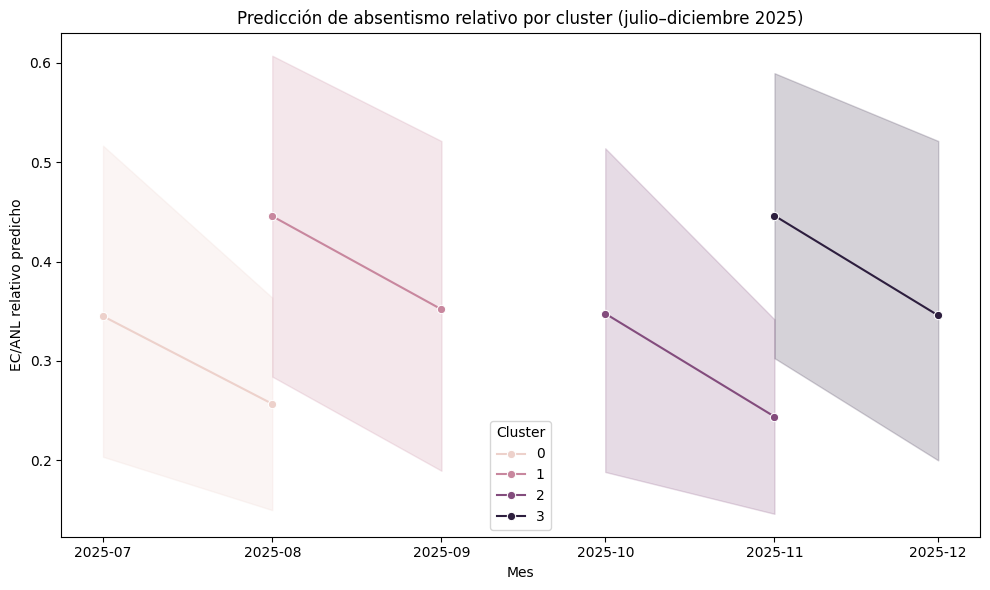

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df_result_pred, x='fecha', y='pred_ec_anl_relativo', hue='cluster', marker='o')
plt.title('Predicción de absentismo relativo por cluster (julio–diciembre 2025)')
plt.xlabel('Mes')
plt.ylabel('EC/ANL relativo predicho')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Exportamos resultados:

In [52]:
ruta_predicciones = RUTA_PROCESSED / "predicciones_absentismo_clusters_2025.csv"
df_result_pred.to_csv(ruta_predicciones, index=False)
print(" Archivo exportado a:", ruta_predicciones)


 Archivo exportado a: /content/drive/MyDrive/TFM/data/processed/predicciones_absentismo_clusters_2025.csv


In [53]:
# Asegúrate de tener la columna 'cluster' asociada a cada puesto
df_temp = df_filtrado.merge(puestos_por_cluster[['puesto', 'cluster']], on='puesto', how='left')

# Calcular el absentismo medio mensual por cluster
df_historico = (
    df_temp.groupby(['fecha', 'cluster'])['ec_anl_relativo']
    .mean()
    .reset_index()
)

print(df_historico.head())


       fecha  cluster  ec_anl_relativo
0 2023-01-01        0         0.477766
1 2023-01-01        1         0.160619
2 2023-01-01        2         0.145161
3 2023-01-01        3         0.350750
4 2023-02-01        0         0.400119


In [54]:
# Unir histórico + predicción
df_evolucion = pd.concat([df_historico, df_result_pred], ignore_index=True)

# Ordenar cronológicamente
df_evolucion = df_evolucion.sort_values(['cluster', 'fecha'])


In [55]:
# Etiquetar si es valor observado o predicho
df_evolucion['tipo'] = 'real'
df_evolucion.loc[df_evolucion['fecha'] > '2025-06-30', 'tipo'] = 'predicho'


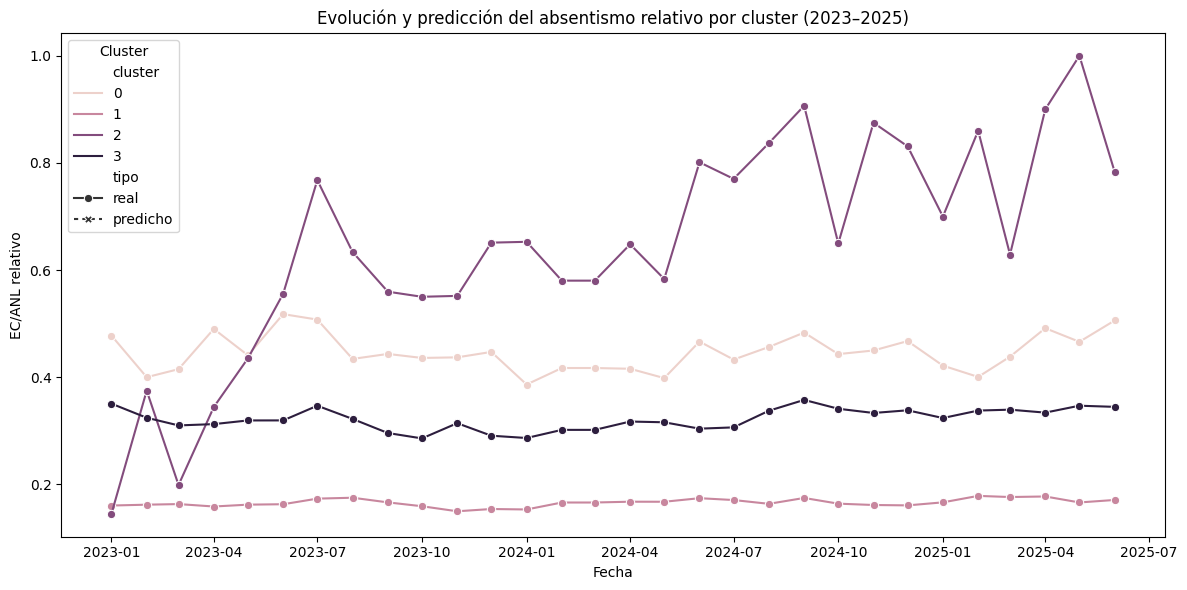

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_evolucion,
    x='fecha',
    y='ec_anl_relativo',
    hue='cluster',
    style='tipo',
    markers=True,
    dashes={'real': '', 'predicho': (2,2)}
)

plt.title('Evolución y predicción del absentismo relativo por cluster (2023–2025)')
plt.xlabel('Fecha')
plt.ylabel('EC/ANL relativo')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Guardamos dataset completo:

In [57]:
ruta_evolucion = RUTA_PROCESSED / "evolucion_absentismo_clusters_2023_2025.csv"
df_evolucion.to_csv(ruta_evolucion, index=False)
print("Archivo exportado a:", ruta_evolucion)


Archivo exportado a: /content/drive/MyDrive/TFM/data/processed/evolucion_absentismo_clusters_2023_2025.csv
